[[   0    0]
 [2632 2368]]


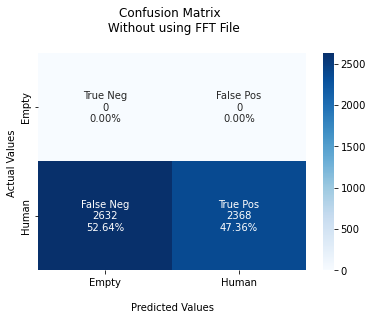

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.47      0.64      5000

    accuracy                           0.47      5000
   macro avg       0.50      0.24      0.32      5000
weighted avg       1.00      0.47      0.64      5000

TPR: [   nan 0.4736]
TNR: [0.4736    nan]
PPV: [0. 1.]
NPV: [1. 0.]
FPR: [52.64   nan]
FNR: [  nan 52.64]
FDR: [1. 0.]
ACC: [0.4736 0.4736]


C:\Users\Ravikumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ravikumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ravikumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ravikumar\AppData\Local\Temp\ipykernel_20300\1440751723.py

In [1]:
##Without Classification.

import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


df = pd.read_excel ('P2 X = 200 and Y = 10000.xlsx') #change the file name only 
df.drop(df.columns[0], axis=1, inplace=True)
df['Target'] = 2
df.rename(columns = {'Class':'Predicted'}, inplace = True)


X = df.Predicted
y = df.Target

y_true = y
y_pred = X



#Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[1, 2])
print(cm)




import seaborn as sns
import matplotlib.pyplot as plt     
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n Without using FFT File\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Empty', 'Human'])
ax.yaxis.set_ticklabels(['Empty', 'Human'])
## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_true, y_pred))

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

#Precision 

Precision = TP/(TP+FP)

#Recall 

Recall = TP/(TP+FN)

#F1 score

f1_score = (Precision*Recall)/(Precision+Recall)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('TPR: '+str(TPR))
print('TNR: '+str(TNR))
print('PPV: '+str(PPV))
print('NPV: '+str(NPV))
print('FPR: '+str(FPR*100))
print('FNR: '+str(FNR*100))
print('FDR: '+str(FDR))
print('ACC: '+str(ACC))


[[1910  694]
 [1297 1049]]


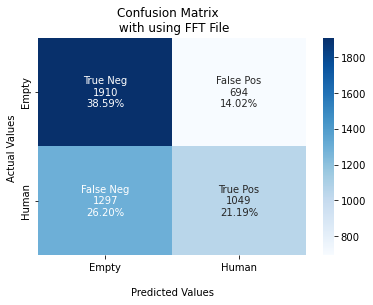

              precision    recall  f1-score   support

           1       0.60      0.73      0.66      2604
           2       0.60      0.45      0.51      2346

    accuracy                           0.60      4950
   macro avg       0.60      0.59      0.59      4950
weighted avg       0.60      0.60      0.59      4950

TPR: [0.73348694 0.44714408]
TNR: [0.44714408 0.73348694]
PPV: [0.59557219 0.60183592]
NPV: [0.60183592 0.59557219]
FPR: [55.2855925  26.65130568]
FNR: [26.65130568 55.2855925 ]
FDR: [0.40442781 0.39816408]
ACC: [0.40442781 0.39816408]


In [37]:
#with Classification 

import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import category_encoders as ce

# label the data and remove the unwanted column
df = pd.read_csv('fft_P2 Winter Wear noMovement X200Y10000_.txt', delimiter="\t") # only change file name 
df1 = df.drop(['V0,2', '2,48', '0,0'], axis = 1) # check the fft file first and as per that change it, because in this only int value to train data. 
df1.drop(df.columns[0], axis=1, inplace=True)
df1['Target'] = 2 # Creating a traget column with respect the usecase.
df1.rename(columns = {'1':'Predicted'}, inplace = True)#label the data.
X = df1.drop(['Predicted'],axis=1).values
y = df1.Predicted



# Split the data in train and test form. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.99, random_state=26)



# initiate an rf classifier using a pipeline
clf = make_pipeline(
    SimpleImputer(strategy="mean"), RandomForestClassifier(random_state=26))

# train the classifier on training data
clf.fit(X_train, y_train)

# make predictions on test data
pred = clf.predict(X_test)

#Generate the confusion matrix
cm1 = confusion_matrix(y_test, pred, labels=[1, 2])
print(cm1)

import seaborn as sns
import matplotlib.pyplot as plt     
import seaborn as sns
import matplotlib.pyplot as plt     
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm1.flatten()/np.sum(cm1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix  \n with using FFT File');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Empty', 'Human'])
ax.yaxis.set_ticklabels(['Empty', 'Human'])
## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, pred))


FP = cm1.sum(axis=0) - np.diag(cm1)
FN = cm1.sum(axis=1) - np.diag(cm1)
TP = np.diag(cm1)
TN = cm1.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('TPR: '+str(TPR))
print('TNR: '+str(TNR))
print('PPV: '+str(PPV))
print('NPV: '+str(NPV))
print('FPR: '+str(FPR*100))
print('FNR: '+str(FNR*100))
print('FDR: '+str(FDR))
print('ACC: '+str(ACC))


In [20]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [39]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier


# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)


# fit the model

rfc.fit(X_train, y_train)


# Predict the Test set results

y_pred = rfc.predict(X_test)


# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5925


In [40]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1953  651]
 [1366  980]]


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.75      0.66      2604
           2       0.60      0.42      0.49      2346

    accuracy                           0.59      4950
   macro avg       0.59      0.58      0.58      4950
weighted avg       0.59      0.59      0.58      4950



In [27]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)



RandomForestClassifier()

In [32]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.6988


In [29]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [14]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)